## 準備

In [1]:
import logging
import warnings

import torch

device = torch.device(
    "cuda" if torch.cuda.is_available() else "cpu"
)
dtype = torch.float16
seed = 19950815

warnings.simplefilter("ignore", FutureWarning)

# error ログを無視する
logger_name = "diffusers.models.modeling_utils"
logging.getLogger(logger_name).setLevel(logging.ERROR)

## 動作確認用データ 1 の取得と確認

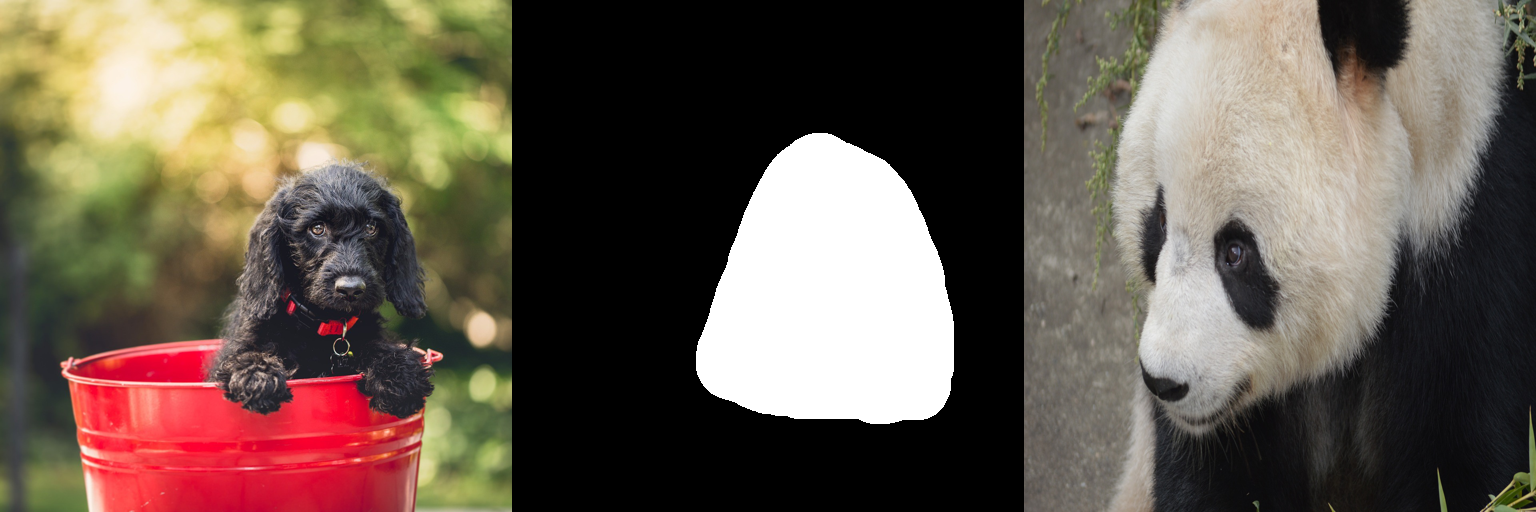

In [2]:
from diffusers.utils import load_image, make_image_grid

resize_size = (512, 512)

urls = {
    "init": "https://raw.githubusercontent.com/Fantasy-Studio/Paint-by-Example/main/examples/image/example_1.png",
    "mask": "https://raw.githubusercontent.com/Fantasy-Studio/Paint-by-Example/main/examples/mask/example_1.png",
    "example": "https://raw.githubusercontent.com/Fantasy-Studio/Paint-by-Example/main/examples/reference/example_1.jpg",
}
images = {
    k: load_image(url).resize(resize_size)
    for k, url in urls.items()
}
make_image_grid(list(images.values()), rows=1, cols=3)

## Paint-by-Example を実装した PaintByExamplePipeline の読み込み

In [3]:
from diffusers import PaintByExamplePipeline

model_id = "Fantasy-Studio/Paint-by-Example"
pipe = PaintByExamplePipeline.from_pretrained(
    model_id, torch_dtype=dtype
)
pipe = pipe.to(device)

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

You are using a model of type clip_vision_model to instantiate a model of type clip. This is not supported for all configurations of models and can yield errors.
An error occurred while trying to fetch /root/.cache/huggingface/hub/models--Fantasy-Studio--Paint-by-Example/snapshots/351e6427d8c28a3b24f7c751d43eb4b6735127f7/vae: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--Fantasy-Studio--Paint-by-Example/snapshots/351e6427d8c28a3b24f7c751d43eb4b6735127f7/vae.
An error occurred while trying to fetch /root/.cache/huggingface/hub/models--Fantasy-Studio--Paint-by-Example/snapshots/351e6427d8c28a3b24f7c751d43eb4b6735127f7/unet: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--Fantasy-Studio--Paint-by-Example/snapshots/351e6427d8c28a3b24f7c751d43eb4b6735127f7/unet.


## Paint-by-Example による画像編集 1

  0%|          | 0/50 [00:00<?, ?it/s]

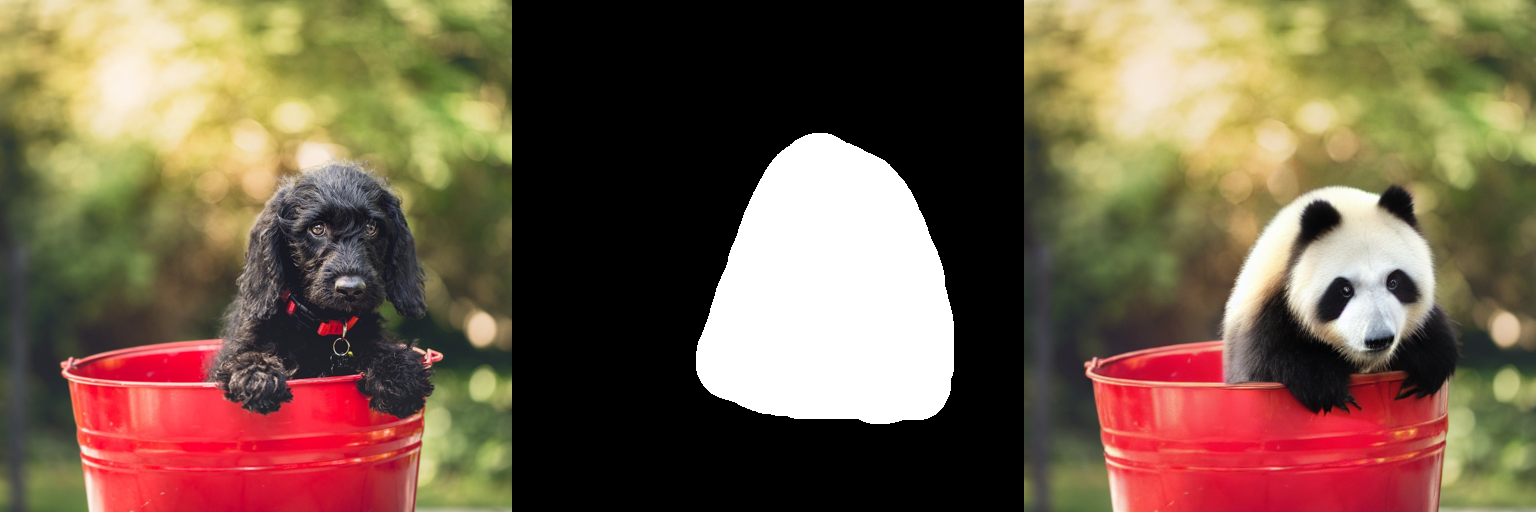

In [4]:
edited_image = pipe(
    image=images["init"],
    mask_image=images["mask"],
    example_image=images["example"],
    generator=torch.manual_seed(seed),
).images[0]

images = [images["init"], images["mask"], edited_image]
make_image_grid(images, rows=1, cols=3)

## 動作確認用データ 2 の取得と確認

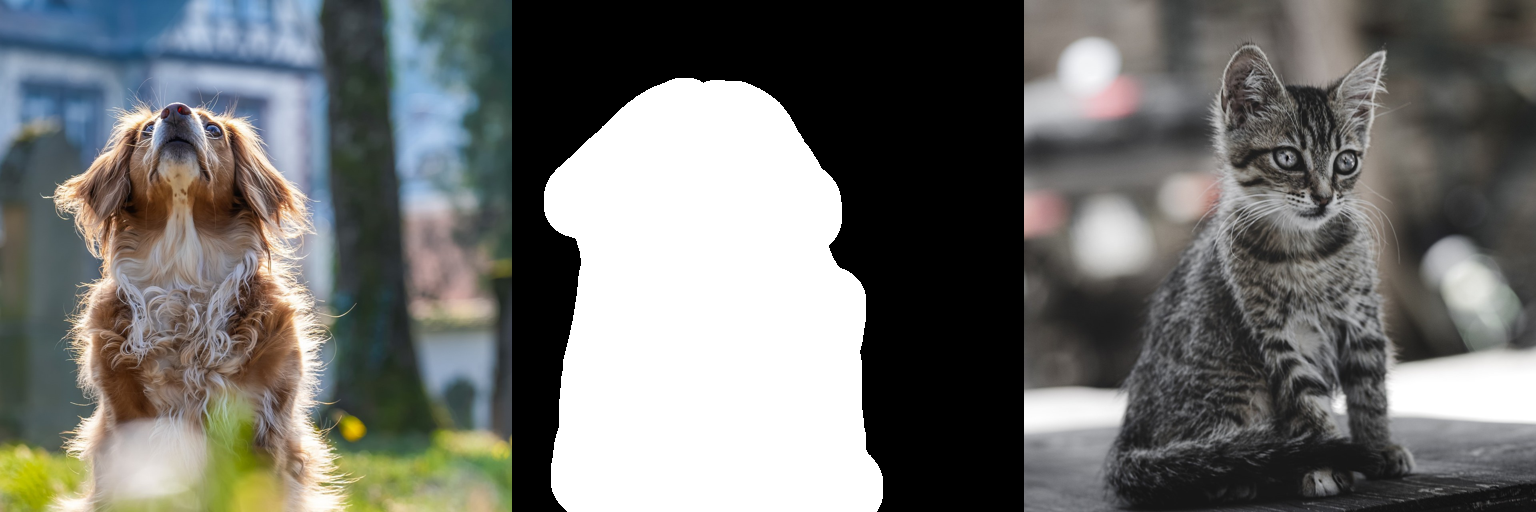

In [5]:
urls = {
    "init": "https://raw.githubusercontent.com/Fantasy-Studio/Paint-by-Example/main/examples/image/example_2.png",
    "mask": "https://raw.githubusercontent.com/Fantasy-Studio/Paint-by-Example/main/examples/mask/example_2.png",
    "example": "https://raw.githubusercontent.com/Fantasy-Studio/Paint-by-Example/main/examples/reference/example_2.jpg",
}
images = {
    k: load_image(url).resize(resize_size)
    for k, url in urls.items()
}
make_image_grid(list(images.values()), rows=1, cols=3)

## Paint-by-Example による画像編集 2

  0%|          | 0/50 [00:00<?, ?it/s]

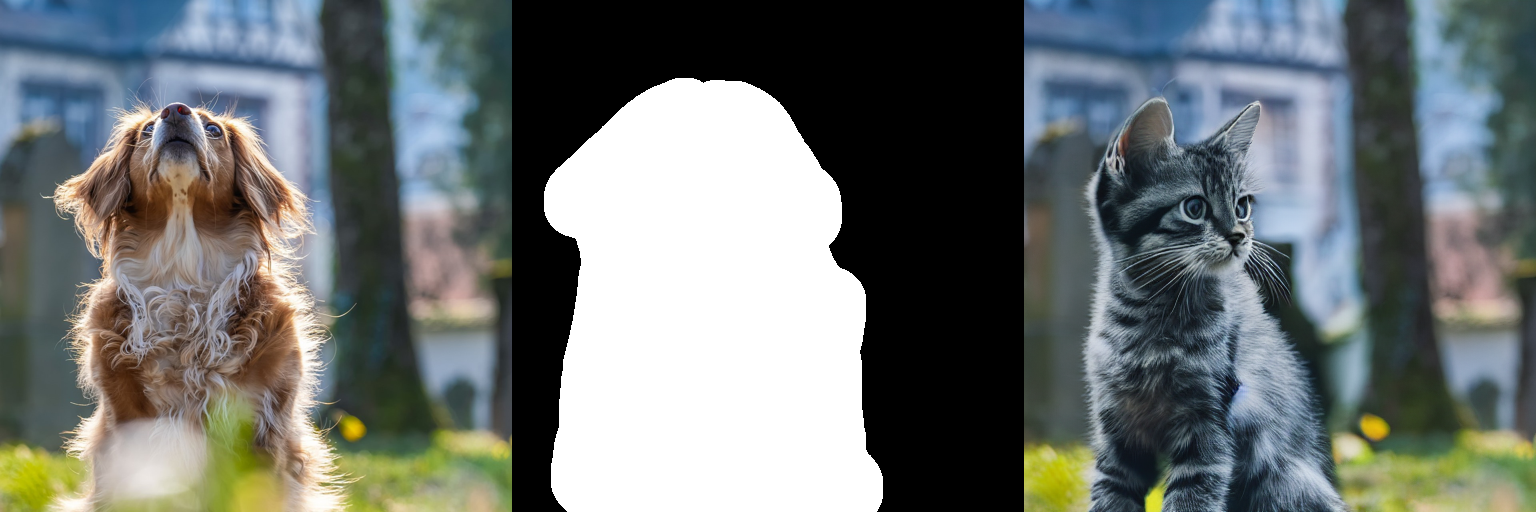

In [6]:
edited_image = pipe(
    image=images["init"],
    mask_image=images["mask"],
    example_image=images["example"],
    generator=torch.manual_seed(seed),
).images[0]

images = [images["init"], images["mask"], edited_image]
make_image_grid(images, rows=1, cols=3)

## 動作確認用データ 3 の取得と確認

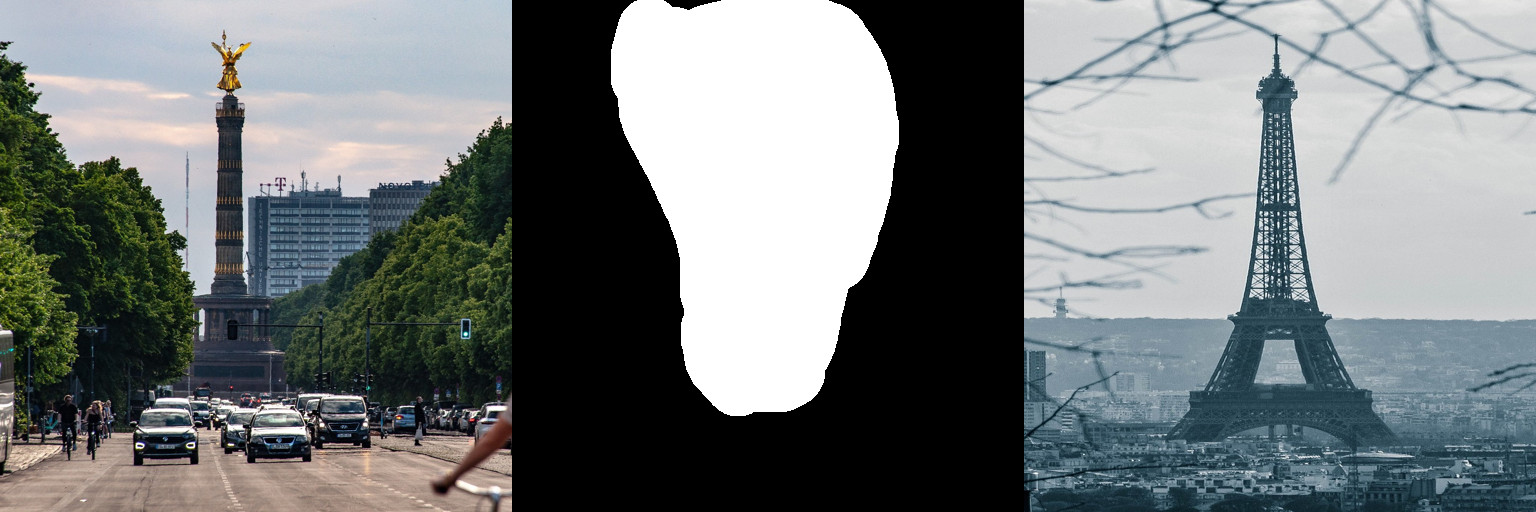

In [7]:
urls = {
    "init": "https://raw.githubusercontent.com/Fantasy-Studio/Paint-by-Example/main/examples/image/example_3.png",
    "mask": "https://raw.githubusercontent.com/Fantasy-Studio/Paint-by-Example/main/examples/mask/example_3.png",
    "example": "https://raw.githubusercontent.com/Fantasy-Studio/Paint-by-Example/main/examples/reference/example_3.jpg",
}
images = {
    k: load_image(url).resize(resize_size)
    for k, url in urls.items()
}
make_image_grid(list(images.values()), rows=1, cols=3)

  0%|          | 0/50 [00:00<?, ?it/s]

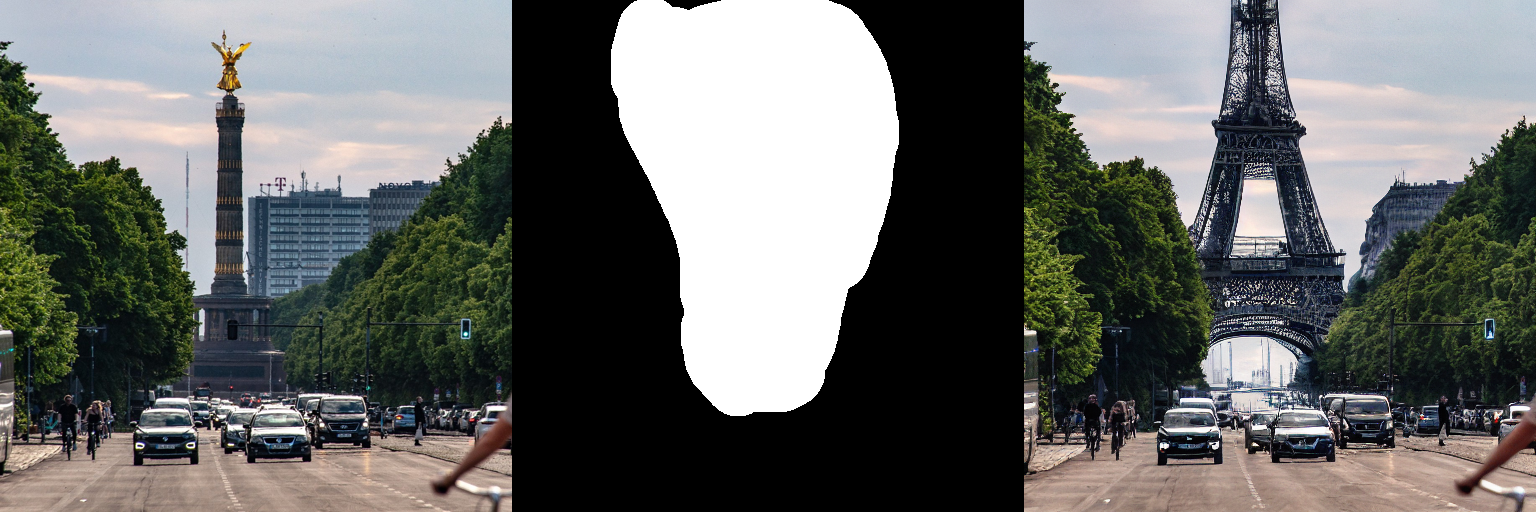

In [8]:
edited_image = pipe(
    image=images["init"],
    mask_image=images["mask"],
    example_image=images["example"],
    generator=torch.manual_seed(seed),
).images[0]

images = [images["init"], images["mask"], edited_image]
make_image_grid(images, rows=1, cols=3)